comp без сжатия
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

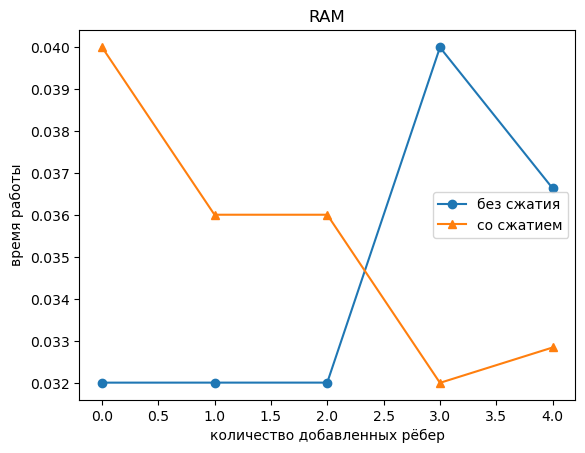

In [18]:
import time
import matplotlib.pyplot as plt

# P - это узлы дерева
def create_a_singleton(x, P, R):
    P[x] = x
    R[x] = 0
    
def search_for_the_root(x, P): #поиск корня дерева, в котором находится интересующий нас x
    if (P[x] == 0):
        return 0
    else:
        y = x
        while(P[y] != y):
            y = P[y]
        return y        
    
def join1(x, y, P, R):
    if(R[x] > R[y]):
        P[y] = x
    elif (R[y] > R[x]):
        P[x] = y
    elif (R[y] == R[x]):
        P[y] = x
        R[x] = R[x] + 1    

def join(x, y, P, R):
    if((P[x] == x) and (P[y] == y)):
        if(R[x] > R[y]):
            P[y] = x
            R[x] = R[x] + R[y] +1
        elif (R[y] > R[x]):
            P[x] = y
            R[y] = R[x] + R[y] +1
        elif (R[y] == R[x]):
            P[y] = x
            R[x] = R[x] + 1
    elif((P[y] == y) and (P[x] != x)):
        P[y] = x
        R[x] = R[x] + R[y] +1
    elif((P[x] == x) and (P[y] != y)):   
        P[x] = y
        R[y] = R[x] + R[y] +1
    elif((P[x] != x) and (P[y] != y)): 
        tmpx = search_for_the_root(x, P)
        tmpy = search_for_the_root(y, P)
        if (tmpx != tmpy):
           
            
            if(R[tmpx] > R[tmpy]):
                P[tmpy] = x
                
            elif (R[tmpy] > R[tmpx]):
                P[tmpx] = y
                
            elif (R[tmpy] == R[tmpx]):
                
                P[tmpy] = x
                R[tmpx] = R[tmpx] + 1
        
n = 50005 #вершины
m = 50000 #рёбра

V = list(range(0, n))
E = [[]*2 for i in range(m)]
for i in range(0, m):
    E[i] = [0, -1]
    
comp1 = [0]*n 
comp = [0]*n 
P = [0]*n #представление системы(коллекции) разделенных мн-в
P1 = [0]*n
R = [0]*n #массив рангов
R1 = [0]*n
#простой пример
#Заполняем массив рёбер
for i in range(0, 10000):
    E[i] = [0, i + 1]
for i in range(10002, 20000):
    E[i] = [10001, i + 1]
for i in range(20002, 30000):
    E[i] = [20001, i + 1]
for i in range(30002, 40000):
    E[i] = [30001, i + 1]
for i in range(40002, 50000):
    E[i] = [40001, i + 1]

#со сжатием
def RAM1(comp, E, n, m, P, R):
    for i in range(0, n):
        create_a_singleton(i, P, R)
    for i in range(0, m):
        a = search_for_the_root(E[i][0], P)
        
        b = search_for_the_root(E[i][1], P)
        
        if (a != b):
            join1(a, b, P, R)
            
    for i in range(0, n):
        comp[i] = search_for_the_root(i, P)
        
        
def RAM(comp, E, n, m, P, R):
    for i in range(0, n):
        create_a_singleton(i, P, R)
    for i in range(0, m):
        a = E[i][0]
        b = E[i][1]
        if (a != b):
            join(a, b, P, R)
    for i in range(0, n):
        comp[i] = search_for_the_root(i, P)    
        
time0 = [0] #без сжатия         
time1 = [0] #со сжатием

start = time.time()
RAM(comp, E, n, m, P, R)
time0[0] = time.time() - start
print("comp без сжатия")
print(comp[1:])

start = time.time()
RAM1(comp1, E, n, m, P1, R1)
time1[0] = time.time() - start
print("comp со сжатием")
print(comp1[1:])

q = int(input())
while(q != -1):
    a = int(input())
    b = int(input())
    E.append([a, b]) 
    m+=1
    start = time.time()
    RAM(comp, E, n, m, P, R)
    time0.append(time.time() - start)
    
    start = time.time()
    RAM1(comp1, E, n, m, P1, R1)
    time1.append(time.time() - start)
    
    print("comp без сжатия")
    print(comp[1:])
    print("comp со сжатием")
    print(comp1[1:])
    q = int(input())

horizontal_axis = list(range(0, len(time1)))
plt.title("RAM")
plt.xlabel("количество добавленных рёбер")
plt.ylabel("время работы")
plt.plot(horizontal_axis, time0, label = "без сжатия", marker = "o")    
plt.plot(horizontal_axis, time1, label = "со сжатием", marker = "^") 
plt.legend()   
plt.show()
    
    




        

comp без сжатия
[1, 2, 3, 4, 5, 6, 7, 8, 9]
comp со сжатием
[1, 2, 3, 4, 5, 6, 7, 8, 0]
comp без сжатия
[1, 1, 3, 4, 5, 6, 7, 8, 9]
comp со сжатием
[1, 1, 3, 4, 5, 6, 7, 8, 0]
comp без сжатия
[1, 1, 1, 4, 5, 6, 7, 8, 9]
comp со сжатием
[1, 1, 1, 4, 5, 6, 7, 8, 0]
comp без сжатия
[1, 1, 1, 1, 5, 6, 7, 8, 9]
comp со сжатием
[1, 1, 1, 1, 5, 6, 7, 8, 0]


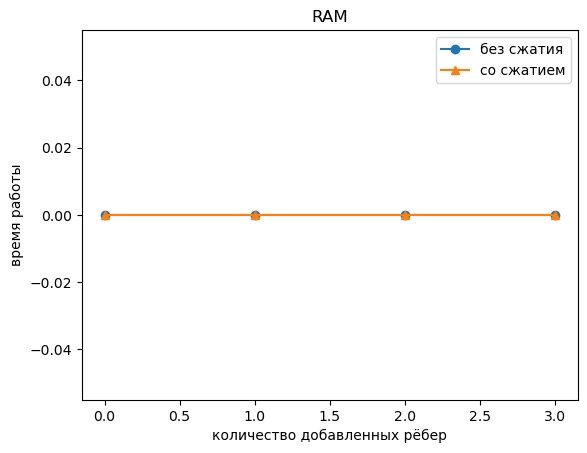

In [17]:
import time
import matplotlib.pyplot as plt

# P - это узлы дерева
def create_a_singleton(x, P, R):
    P[x] = x
    R[x] = 0
    
def search_for_the_root(x, P): #поиск корня дерева, в котором находится интересующий нас x
    if (P[x] == 0):
        return 0
    else:
        y = x
        while(P[y] != y):
            y = P[y]
        return y        
    
def join1(x, y, P, R):
    if(R[x] > R[y]):
        P[y] = x
    elif (R[y] > R[x]):
        P[x] = y
    elif (R[y] == R[x]):
        P[y] = x
        R[x] = R[x] + 1    

def join(x, y, P, R):
    if((P[x] == x) and (P[y] == y)):
        if(R[x] > R[y]):
            P[y] = x
            R[x] = R[x] + R[y] +1
        elif (R[y] > R[x]):
            P[x] = y
            R[y] = R[x] + R[y] +1
        elif (R[y] == R[x]):
            P[y] = x
            R[x] = R[x] + 1
    elif((P[y] == y) and (P[x] != x)):
        P[y] = x
        R[x] = R[x] + R[y] +1
    elif((P[x] == x) and (P[y] != y)):   
        P[x] = y
        R[y] = R[x] + R[y] +1
    elif((P[x] != x) and (P[y] != y)): 
        tmpx = search_for_the_root(x, P)
        tmpy = search_for_the_root(y, P)
        if (tmpx != tmpy):
           
            
            if(R[tmpx] > R[tmpy]):
                P[tmpy] = x
                
            elif (R[tmpy] > R[tmpx]):
                P[tmpx] = y
                
            elif (R[tmpy] == R[tmpx]):
                
                P[tmpy] = x
                R[tmpx] = R[tmpx] + 1
        
n = 10 #вершины
m = 10 #рёбра

V = list(range(0, n))
E = [[]*2 for i in range(m)]
for i in range(0, m):
    E[i] = [0, -1]
    
comp1 = [0]*n 
comp = [0]*n 
P = [0]*n #представление системы(коллекции) разделенных мн-в
P1 = [0]*n
R = [0]*n #массив рангов
R1 = [0]*n
#простой пример


#со сжатием
def RAM1(comp, E, n, m, P, R):
    for i in range(0, n):
        create_a_singleton(i, P, R)
    for i in range(0, m):
        a = search_for_the_root(E[i][0], P)
        
        b = search_for_the_root(E[i][1], P)
        
        if (a != b):
            join1(a, b, P, R)
            
    for i in range(0, n):
        comp[i] = search_for_the_root(i, P)
        
        
def RAM(comp, E, n, m, P, R):
    for i in range(0, n):
        create_a_singleton(i, P, R)
    for i in range(0, m):
        a = E[i][0]
        b = E[i][1]
        if (a != b):
            join(a, b, P, R)
    for i in range(0, n):
        comp[i] = search_for_the_root(i, P)    
        
time0 = [0] #без сжатия         
time1 = [0] #со сжатием

start = time.time()
RAM(comp, E, n, m, P, R)
time0[0] = time.time() - start
print("comp без сжатия")
print(comp[1:])

start = time.time()
RAM1(comp1, E, n, m, P1, R1)
time1[0] = time.time() - start
print("comp со сжатием")
print(comp1[1:])

q = int(input())
while(q != -1):
    a = int(input())
    b = int(input())
    E.append([a, b]) 
    m+=1
    start = time.time()
    RAM(comp, E, n, m, P, R)
    time0.append(time.time() - start)
    
    start = time.time()
    RAM1(comp1, E, n, m, P1, R1)
    time1.append(time.time() - start)
    
    print("comp без сжатия")
    print(comp[1:])
    print("comp со сжатием")
    print(comp1[1:])
    q = int(input())

horizontal_axis = list(range(0, len(time1)))
plt.title("RAM")
plt.xlabel("количество добавленных рёбер")
plt.ylabel("время работы")
plt.plot(horizontal_axis, time0, label = "без сжатия", marker = "o")    
plt.plot(horizontal_axis, time1, label = "со сжатием", marker = "^") 
plt.legend()   
plt.show()